In [56]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import pandas as pd
from openml import setups, flows
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=4, rc={"lines.markersize": 15})
plt.rc('hatch', color='white', linewidth=4)
plt.rcParams.update({
    "font.family": "serif",
     "font.serif": [] ,
      "font.sans-serif": []  })

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]
OTHER_COLOR = sns.color_palette()[2]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/papers/images/experiment-results'

output_directory = WRITE_DIRECTORY_ROOT + '/openml/operations_count'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

In [73]:
MODE = 'remote'
result_folder = ROOT_RESULT_FOLDER + '/' + MODE + '/operations_count/openml'
result_file = result_folder + '/cloud-41/2019-10-17/08-10.csv'

In [74]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'pipeline', 'setup', 'type', 'warmstart', 'mat_budget','score', 'operation_count'
]

method_map = {'optimized': 'CO', 'baseline': 'OML'}
operations_count = pd.read_csv(result_file, header=None, names=HEADERS)

operations_count['cumulative_operation_count'] = operations_count.groupby(['exp_id', 'type','mat_budget'])['operation_count'].apply(lambda x: x.cumsum())
operations_count['mat_budget'] = operations_count['mat_budget'] / (1024. * 1024.)
operations_count['workload'] = operations_count.groupby(['exp_id', 'type','mat_budget']).cumcount() + 1
operations_count['type'] = operations_count['type'].replace(method_map)


In [75]:
operations_count['type'] = ['CO+W' if (x['type'] == 'CO') and (x['warmstart'] == True) else x['type'] for i,x in operations_count[['type','warmstart']].iterrows()]


In [76]:
operations_count['type'] = ['CO-W' if (x['type'] == 'CO') and (x['warmstart'] == False) else x['type'] for i,x in operations_count[['type','warmstart']].iterrows()]


In [94]:
def plot_operations_count(df,loc=None):
    plt.figure(figsize=(7,4))
    plot = sns.lineplot(
        data=df,
        x='workload',
        y='cumulative_operation_count',
        hue='type',
        style='type',
        lw=3,
        hue_order=['CO+W','OML','CO-W'],
        dashes={
            'CO+W': (1, 0),
            'OML': (1, 1),
            'CO-W': (2, 1),
        },
         palette={
            'CO+W': SYSTEM_COLOR,
            'OML': BASELINE_COLOR,
            'CO-W': OTHER_COLOR
        },
        legend='brief')

    legend = plt.legend(
            loc='upper left',
            handletextpad=0.1,
            labelspacing=0.0,
            bbox_to_anchor=(-.08, 1.3))
    legend.texts[0].set_text("")
    for line in legend.get_lines():
        line.set_linewidth(3.0)
    plot.set_xlabel('OpenML Workload', fontsize=30)
    plot.set_ylabel('Num of Operations', fontsize=30)
    plt.tick_params(labelsize=30)

    lg = plt.legend(
        loc='upper center',
        handlelength=1.5,
        handletextpad=0.1,
        fontsize=28,
        ncol=3,
        columnspacing=0.5,
        bbox_to_anchor=(0.55, 1.2))
    handles = lg.legendHandles
    labels = ['CO+W','OML','CO-W']
    del handles[0]
        handles,
        labels,
        loc='upper center',
        handlelength=1.5,
        handletextpad=0.05,
        fontsize=32,
        numpoints=1,
        ncol=3,
        columnspacing=0.5,
        bbox_to_anchor=(0.55, 1.25))
        import matplotlib.ticker as ticker
    plot.yaxis.set_major_formatter(ticker.EngFormatter())
    
    for line in legend.get_lines():
        line.set_linewidth(4.0)
    if loc is not None:
        plt.savefig(loc, bbox_inches='tight')

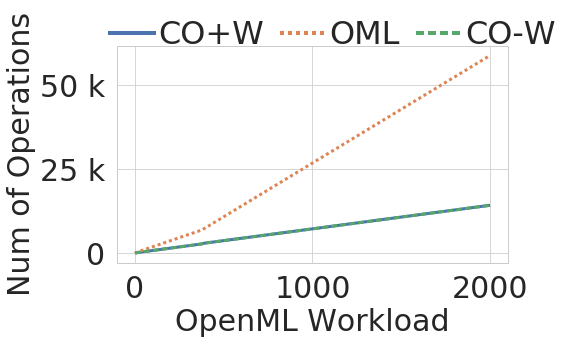

In [98]:
#plot_operations_count(operations_count)
plot_operations_count(operations_count, output_directory+'/operations_count.pgf')
